In [52]:
import numpy as np
import pandas as pd

from typing import Tuple

def extract_time(df: pd.DataFrame) -> np.ndarray:
    t = df['t'].to_numpy() * 1e-9
    return t

def sync_timeseries(
    ref_time: np.ndarray,
    ref_data: np.ndarray,
    data_time: np.ndarray,
    data: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:

    idx = np.searchsorted(ref_time, data_time, side="right") - 1

    valid = idx >= 0

    t_sync = data_time[valid]
    ref_sync = ref_data[idx[valid]]
    data_sync = data[valid]

    t_sync -= t_sync[0]

    return t_sync, ref_sync, data_sync

In [53]:
from load_parquet import load_topic_dataframes

path = '../data/first.parquet'

ms2kmh = 3.6

In [54]:
dataframes = load_topic_dataframes(path)
dataframes.keys()

dict_keys(['control', 'v_ref', 'y_vector', 'velocity', 'imu'])

In [55]:
control = dataframes['control']
control.head(1)

,t,throttle,steer,brake,hand_brake,reverse,gear,manual_gear
0,1765986246869607111,0.0,0.0,0.0,False,False,0.0,False


In [56]:
v_ref = dataframes['v_ref']
v_ref.head(1)

,t,v_ref
0,1765986259223553737,11.111111


In [57]:
y_vector = dataframes['y_vector']
y_vector.head(1)

,t,y_x,y_y,y_z
0,1765986259223558837,-11.111111,0.0,0.0


In [58]:
velocity = dataframes['velocity']
velocity.head(1)

,t,vx,vy,vz,wx,wy,wz
0,1765986246869599731,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
imu = dataframes['imu']
imu.head(1)

,t,ax,ay,az,gx,gy,gz
0,1765986246724712759,0.0,-0.0,9.81,-0.0,0.0,-0.0


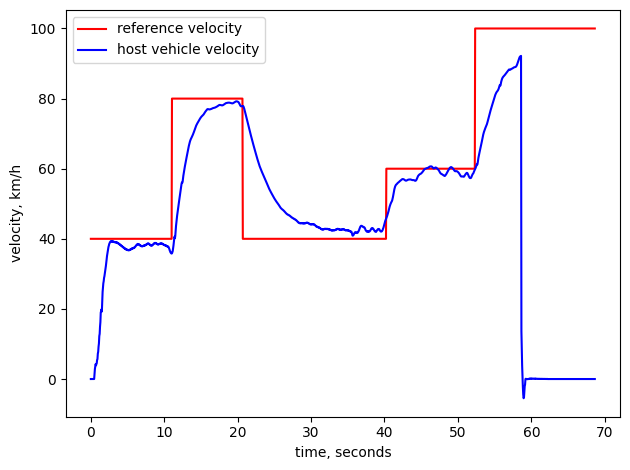

In [60]:
import matplotlib.pyplot as plt

v_ref_time = extract_time(v_ref)
v_ref_data = v_ref['v_ref'].to_numpy() * ms2kmh

v_time = extract_time(velocity)
v_data = velocity['vx'].to_numpy() * ms2kmh

t, v_ref_sync, v_sync = sync_timeseries(v_ref_time, v_ref_data, v_time, v_data)

plt.plot(t, v_ref_sync, label='reference velocity', color='r')
plt.plot(t, v_sync, label='host vehicle velocity', color='b')

plt.legend()
plt.ylabel('velocity, km/h')
plt.xlabel('time, seconds')
plt.tight_layout()